##### <div style="text-align: right; font-family:Georgia;"> ***Sam VALLET et Thomas SINAPI*** </div>
## <center><span style="font-family:Georgia; font-size:3em;"> **Projet IAS** </span></center>


In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer


from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


***
## **PRE PROCESSING :** ##
***

### **Premier dataset :** *"english_premier_league_data.csv" dont on conserve toutes les features statistiques* ###

In [2]:
df1 = pd.read_csv('Result_dataset/english_premier_league_data.csv', sep=';')
df1 = df1[df1['year'].isin([2016, 2017, 2018, 2019, 2020])] # on se restreint à ces années 
df1 = df1.rename(columns={'year': 'season'})
df1 = df1.drop(["Score","Half Time Score"], axis = 1)
df1 = df1.rename(columns={'Home Team Goals Scored': 'HT Goals Scored', 'Away Team Goals Scored': 'AT Goals Scored', # pour gagner de la place on remplace "HT" -> "HT" et "Away Team" -> "AT"
                          'Home Team Goals Conceeded': 'HT Goals Conceeded', 'Away Team Goals Conceeded': 'AT Goals Conceeded',
                          'Home Team Rating': 'HT Rating', 'Away Team Rating': 'AT Rating', 
                          'Home Team Possession %': 'HT Posses %', 'Away Team Possession %': 'AT Posses %',
                          'Home Team Off Target Shots': 'HT OffT Shots', 'Away Team Off Target Shots': 'AT OffT Shots',
                          'Home Team On Target Shots': 'HT OnT Shots', 'Away Team On Target Shots': 'AT OnT Shots',
                          'Home Team Total Shots': 'HT TotShots', 'Away Team Total Shots': 'AT TotShots',
                          'Home Team Blocked Shots': 'HT Block Shots', 'Away Team Blocked Shots': 'AT Block Shots',
                          'Home Team Corners': 'HT Corners', 'Away Team Corners': 'AT Corners',
                          'Home Team Throw Ins': 'HT Throw Ins', 'Away Team Throw Ins': 'AT Throw Ins',
                          'Home Team Pass Success %': 'HT Pass %', 'Away Team Pass Success %': 'AT Pass %',
                          'Home Team Aerials Won': 'HT Aerials Won', 'Away Team Aerials Won': 'AT Aerials Won',
                          'Home Team Clearances': 'HT Clear', 'Away Team Clearances': 'AT Clear',
                          'Home Team Fouls': 'HT Fouls', 'Away Team Fouls': 'AT Fouls',
                          'Home Team Second Yellow Cards': 'HT SecYellowC', 'Away Team Second Yellow Cards': 'AT SecYellowC',
                          'Home Team Red Cards': 'HT RedC', 'Away Team Red Cards': 'AT RedC',
                          'Home Team Yellow Cards': 'HT YellowC', 'Away Team Yellow Cards': 'AT YellowC',
                          })


df1.head()

,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season
760,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016
761,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016
762,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016
763,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016
764,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016


***
### **Second dataset :** *"spi_matches.csv" dont on extrait certains features* ###

In [ ]:
df2 = pd.read_csv('SPI_dataset/spi_matches.csv', sep=';')

df2.dropna()

ligues = ['Barclays Premier League']
df2 = df2[df2['league'].isin(ligues)] # que la Premier League

df2 = df2[df2['season'].isin([2016, 2017, 2018, 2019, 2020])] #on se retreint à ces années
df2 = df2.rename(columns={'team1': 'Home Team', 'team2': 'Away Team', # on renomme les features comme df
                          'score1': 'HT Goals Scored', 'score2': 'AT Goals Scored', # pour gagner de la place on remplace "HT" -> "HT" et "Away Team" -> "AT"
                          'xg1': 'HT xG', 'xg2': 'AT xG',
                          'nsxg1': 'HT NSxG', 'nsxg2': 'AT NSxG',
                          'spi1': 'HT SPI Rate', 'spi2': 'AT SPI Rate',
                          'prob1': 'HT ProbWin', 'prob2': 'AT ProbWin',
                          'proj_score1': 'HT ProjScore', 'proj_score2': 'AT ProjScore',
                          'adj_score1': 'HT AdjScore', 'adj_score2': 'AT AdjScore',
                          'importance1': 'HT Importance', 'importance2': 'AT Importance',
                          })

df2 = df2.drop(['league_id', 'league'], axis = 1)


df2.head()



,season,date,Home Team,Away Team,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT Goals Scored,AT Goals Scored,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
13,2016,2016-08-13,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
15,2016,2016-08-13,Hull,Leicester,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
17,2016,2016-08-13,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
18,2016,2016-08-13,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
19,2016,2016-08-13,Burnley,Swansea,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05


In [ ]:
data_set_1 = df1["Away Team"].unique() #liste des équipes de df1 sans doublons
data_set_2 = df2["Away Team"].unique() #liste des équipes de df2 sans doublons

In [ ]:
fuzz.WRatio("TOTTENHAM","Tottenham Hotspur") # etudie la correspondance des string

90

In [ ]:
# on veut identifier les noms d'equipes dans chaque dataframe pour que le merge se fasse correctement
def create_team_dict(data_set_1, data_set_2): #cree dictionnaire avec {nom dataset2 : nom dataset1}
    team_dict = {}
    for team2 in data_set_2:
        for team1 in data_set_1:
            ratio = fuzz.WRatio(team1, team2)
            if ratio >= 87: # ratio de 87 assure la correspondance pour CE dataset
                team_dict[team2] = team1
    return team_dict


In [ ]:
team_names = create_team_dict(data_set_1,data_set_2)
df2['Home Team'] = df2['Home Team'].replace(team_names) # remplace nom dataset2 par nom dataset1 
df2['Away Team'] = df2['Away Team'].replace(team_names)
df2.head()

,season,date,Home Team,Away Team,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT Goals Scored,AT Goals Scored,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
13,2016,2016-08-13,EVERTON,TOTTENHAM,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
15,2016,2016-08-13,HULL CITY,LEICESTER CITY,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
17,2016,2016-08-13,SOUTHAMPTON,WATFORD,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
18,2016,2016-08-13,CRYSTAL PALACE,WEST BROM,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
19,2016,2016-08-13,BURNLEY,SWANSEA,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05


***
### **FUSION DES DEUX DATAFRAMES** ###

In [ ]:
# on merge par le score,les couples d'équipes et l'année 
# ON A DONC NOTRE DATAFRAME PROPRE

df = pd.merge(df1, df2, on=['season', 'Home Team', 'Away Team','HT Goals Scored', 'AT Goals Scored']) 
df.head()


,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,date,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
0,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016,2016-08-13,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05
1,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016,2016-08-13,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05
2,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016,2016-08-13,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05
3,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016,2016-08-13,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05
4,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016,2016-08-13,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05


In [ ]:
df.shape

(1900, 54)

***IDENTIFICATION DES VALEURS MANQUANTES***


In [ ]:
# df_copy = df.copy()

# # supprimer les valeurs manquantes
# df.dropna(inplace=True)

# # identifier les lignes supprimées
# deleted_rows = df_copy[~df_copy.isin(df)].dropna(how='all')
# print("Les lignes supprimées sont:")
# print(deleted_rows)


*(les valeurs manquantes proviennent uniquement des features "Importance" on peut donc les remplacer par la moyenne)*

In [ ]:
# créer une copie du dataframe original
meanHTI = df["HT Importance"].mean()
meanATI = df["AT Importance"].mean()

df["HT Importance"] = df["HT Importance"].fillna(meanHTI)
df["AT Importance"] = df["AT Importance"].fillna(meanATI)


#### ***AJOUT DE COLONNES*** ####
---
*On ajoute une colonne pour l'écart de score de chaque match et l'issue du match.*

In [ ]:
df = df.dropna() 
df["Score Difference"] = df["HT Goals Scored"] - df["AT Goals Scored"]  # on renseigne l'ecart de score
df["Match Outcome"] = df["Score Difference"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)) # on renseigne l'issue du match (1/0/-1)

df['MatchWeek'] = (df.index // 10) + 1 # nouvelle colonne qui donne la "journée" du match (semaine)
col_to_move = df.pop('MatchWeek')
df.insert(0, 'MatchWeek', col_to_move)

col_to_move1 = df.pop('date')
df.insert(0, 'date', col_to_move1)
df["date"] = pd.to_datetime(df["date"]) # on convertie le type de "date"

df = df.sort_values("date") # on trie chronologiquement
df = df.round(2) # 2 chiffres après la virgule


*On ajoute à présent une nouvelle colonne pour chaque feature qui correspond à la moyenne de ce feature sur les 3 précédents matchs de chaque équipe.*  
   
***Ceci nous permettra d'avoir des informations supplémentaires sur l'état de forme et la dynamique d'une équipe !***

In [ ]:
# Fonction pour calculer la valeur moyenne d'un feature lors des 3 derniers matchs pour une équipe (feature de type "HT ..." ou "AT ....")
def get_HA_L3M(df, team, date, match_id, feature):
    previous_matches = df[(df['Home Team'] == team) | (df['Away Team'] == team)]
    previous_matches = previous_matches[previous_matches.index < match_id].sort_values('date', ascending=False).iloc[:3]
    f_score = 0
    for index, row in previous_matches.iterrows():
        if row['Home Team'] == team:
            f_score += row["HT "+ feature]
        else:
            f_score += row["AT "+ feature]
    return f_score/3

# Fonction pour calculer la valeur moyenne d'un feature lors des 3 derniers matchs pour une équipe (feature de type "HT ..." ou "AT ....")
def get_L3M(df, team, date, match_id, feature):
    previous_matches = df[(df['Home Team'] == team) | (df['Away Team'] == team)]
    previous_matches = previous_matches[previous_matches.index < match_id].sort_values('date', ascending=False).iloc[:3]
    f_score = 0
    for index, row in previous_matches.iterrows():
        if row['Home Team'] == team:
            f_score += row[feature]
        else:
            f_score -= row[feature] # (on fait bien - pour inverser les -1 des victoires à l'extérieur) ou la score difference
    return f_score/3



In [ ]:
# featuresL3M = ["Goals Scored", "Goals Conceeded", "xG", "NSxG", "TotShots",
#                 "RedC", "Importance"]
# fL3M = ["Match Outcome", "Score Difference"]

# # on applque les fonctions à tous les features 

# for feature in featuresL3M:
#     df["HT " + feature + " L3M"] = df.apply(lambda x: get_HA_L3M(df, x['Home Team'], x['date'], x.name, feature), axis=1)
#     df["AT " + feature + " L3M"] = df.apply(lambda x: get_HA_L3M(df, x['Away Team'], x['date'], x.name, feature), axis=1)
# for feature in fL3M:
#     df["HT " + feature + " L3M"] = df.apply(lambda x: get_L3M(df, x['Home Team'], x['date'], x.name, feature), axis=1)
#     df["AT " + feature + " L3M"] = df.apply(lambda x: get_L3M(df, x['Away Team'], x['date'], x.name, feature), axis=1)
    

# ########################################################
# # ATTENTION 38 SECONDES POUR L'EXECUTION DE LA CELLULE #
# ########################################################
    

In [ ]:
# #EXEMPLE AVEC LIVERPOOL
# liverpool_matches = df[(df["Home Team"]== "LIVERPOOL") | (df["Away Team"]== "LIVERPOOL") ]
# liverpool_matches[["MatchWeek","Home Team", "Away Team", "Match Outcome", "HT Match Outcome L3M", "AT Match Outcome L3M","Score Difference", "HT Score Difference L3M", "AT Score Difference L3M"]].head(10)# 

In [ ]:
df.head()

,date,MatchWeek,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome
0,2016-08-13,1,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016,53.57,66.81,0.35,0.36,0.29,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05,1,1
1,2016-08-13,1,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016,68.02,73.25,0.39,0.34,0.27,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05,0,0
2,2016-08-13,1,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016,56.32,60.35,0.44,0.27,0.29,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05,0,0
3,2016-08-13,1,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016,58.98,59.74,0.45,0.27,0.29,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05,-1,-1
4,2016-08-13,1,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016,69.49,59.33,0.58,0.19,0.24,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05,0,0


***
### **DATA VISUALIZATION "df" :** ### 
***


In [ ]:
# df.mean()
df.describe()

,MatchWeek,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.0000,1900.0000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,95.500000,5.355579,6.421105,6.216158,51.192105,48.807895,5.223684,4.667368,13.598421,3.719474,5.691053,21.878947,78.314737,18.452632,20.655263,10.624211,1.578421,0.018947,0.032632,4.321579,3.931579,11.269474,3.032105,4.676842,21.144211,77.187368,18.419474,24.302105,10.796316,1.708421,0.027368,0.036842,1.513158,1.2300,1.2300,1.513158,2018.000000,70.213442,70.139032,0.451116,0.313368,0.235542,1.573911,1.224074,35.163916,33.967332,1.554053,1.275211,1.540632,1.273358,1.517679,1.240379,0.283158,0.127895
std,54.861955,1.675894,0.996768,0.992519,13.056100,13.056100,2.705477,2.660516,5.713661,2.548061,3.067062,6.199006,7.722811,7.444608,9.737124,3.429397,1.233061,0.136375,0.183548,2.364218,2.345725,4.932191,2.212636,2.744671,6.232484,7.762716,7.364170,10.564942,3.532753,1.264925,0.163197,0.199289,1.307545,1.2096,1.2096,1.307545,1.414586,11.907131,11.912981,0.201658,0.184723,0.051541,0.529521,0.519239,26.638662,26.022795,0.904959,0.794316,0.806322,0.676755,1.276650,1.181161,1.909989,0.870777
min,1.000000,1.700000,2.400000,1.500000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,51.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,48.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,2016.000000,42.970000,43.410000,0.030000,0.010000,0.050000,0.410000,0.200000,0.000000,0.000000,0.000000,0.000000,0.050000,0.030000,0.000000,0.000000,-9.000000,-1.000000
25%,48.000000,4.100000,5.700000,5.500000,42.000000,39.000000,3.000000,3.000000,9.750000,2.000000,3.000000,18.000000,73.000000,13.000000,14.000000,8.000000,1.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1.000000,3.000000,17.000000,72.000000,13.000000,17.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.0000,0.0000,1.000000,2017.000000,60.847500,60.562500,0.320000,0.187500,0.210000,1.217500,0.880000,12.675000,11.175000,0.850000,0.680000,0.970000,0.780000,1.050000,0.000000,-1.000000,-1.000000
50%,95.500000,5.300000,6.400000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,5.000000,21.000000,79.000000,17.500000,19.000000,10.000000,1.000000,0.000000,0.000000,4.000000,4.000000,11.000000,3.000000,4.000000,21.000000,78.000000,18.000000,23.000000,11.000000,2.000000,0.000000,0.000000,1.000000,1.0000,1.0000,1.000000,2018.000000,68.955000,68.795000,0.440000,0.290000,0.250000,1.460000,1.150000,32.600000,32.250000,1.410000,1.130000,1.420000,1.170000,1.050000,1.050000,0.000000,0.000000
75%,143.000000,6.400000,7.000000,6.800000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,8.000000,26.000000,84.000000,23.000000,26.000000,13.000000,2.000000,0.000000,0.000000,6.0

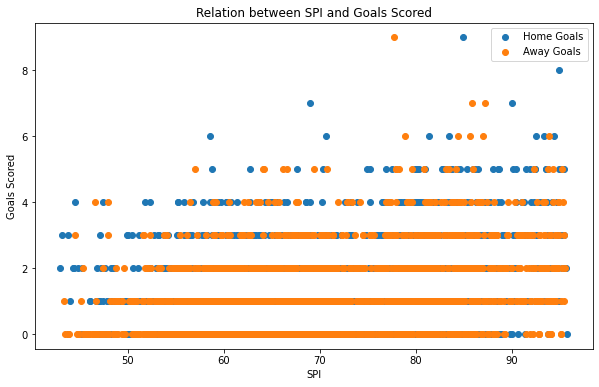

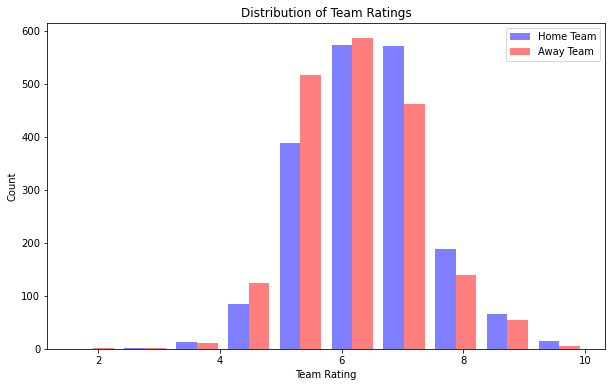

In [ ]:
# GRAPHES DE LA RELATION ENTRE SPI RATE ET LE NBRE BUTS
plt.subplots(figsize=(10, 6))
plt.scatter(df['HT SPI Rate'], df['HT Goals Scored'], label='Home Goals')
plt.scatter(df['AT SPI Rate'], df['AT Goals Scored'], label='Away Goals')

plt.title('Relation between SPI and Goals Scored')
plt.xlabel('SPI')
plt.ylabel('Goals Scored')
plt.legend()

plt.show()


#####
plt.subplots(figsize=(10, 6))
plt.hist([df['HT Rating'], df['AT Rating']], color=['blue', 'red'], alpha=0.5, bins=10)
plt.xlabel('Team Rating')
plt.ylabel('Count')
plt.title('Distribution of Team Ratings')
plt.legend(['Home Team', 'Away Team'])
plt.show()



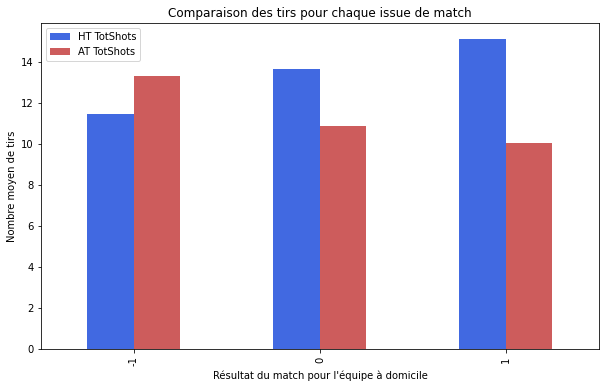

In [ ]:
# Graphique en barres pour comparer les tirs de chaque équipe pour chaque issue de match
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('Match Outcome').agg({'HT TotShots': 'mean', 'AT TotShots': 'mean'}).plot(kind='bar', ax=ax, color=['royalblue', 'indianred'])
ax.set_xlabel('Résultat du match pour l\'équipe à domicile')
ax.set_ylabel('Nombre moyen de tirs')
ax.set_title('Comparaison des tirs pour chaque issue de match')
plt.show()


### **CREATION D'UN NOUVEAU DATAFRAME** ###
***Moyenne des features pour chaque équipe***

In [6]:
#on copie de df pour faire un autre pour chaque équipe
df_matches = df
dfteams = pd.DataFrame()
for team in df_matches["Home Team"].unique(): # on boucle sur chaque équipe unique 

    df_current_team = pd.DataFrame()  # on prend un nouveau DataFrame pour l'équipe courante de la boucle 

    df_home_matches = df_matches[df_matches["Home Team"] == team] # match à domicile de l'équipe courante
    df_away_matches = df_matches[df_matches["Away Team"] == team] # match à l'exterieur de l'équipe courante
    df_all_matches = pd.concat([df_home_matches, df_away_matches]) # on assemble pour avoir tous les matchs de l'équipe courante

    df_current_team["Team"] = [team]
    # on crée une colonne average pour chaque features (*)
    average_possession = (df_home_matches["HT Posses %"].mean() + df_away_matches["AT Posses %"].mean()) / 2
    df_current_team["Average Posses"] = average_possession

    # Features à calculer la moyenne pour chaque équipe
    featuresHA = ["Goals Scored", "Goals Conceeded", "xG", "NSxG", "TotShots", "OffT Shots", "OnT Shots", "Block Shots", "Pass %", 
            "Corners", "Throw Ins", "Aerials Won", "Clear", 
            "Fouls", "YellowC", "SecYellowC", "RedC", "Importance", "ProjScore", "AdjScore", "SPI Rate", "ProbWin"]

    # on repete le processus (*) pour chaque feature de type ("HT" ou "Away Team")
    for feature in featuresHA:
        home_feature_mean = df_home_matches["HT " + feature].mean()  # moyenne pour les matchs à domicile
        away_feature_mean = df_away_matches["AT " + feature].mean()  # moyenne pour les matchs à l'extérieur

        avg_feature = (home_feature_mean + away_feature_mean) / 2 # moyenne pour tous les matchs
        df_current_team["Average " + feature] = avg_feature

    # on fait la même chose pour les issues de match et la différence de buts
    features = ["Match Outcome", "Score Difference"]
    
    for feature in features:

        home_feature_mean = df_home_matches[feature].mean()  # moyenne pour les matchs à domicile
        away_feature_mean = df_away_matches[feature].mean()  # moyenne pour les matchs à l'extérieur

        avg_feature = (home_feature_mean - away_feature_mean) / 2 # moyenne pour tous les matchs (on fait bien - pour inverser les -1 des victoires à l'extérieur)
        df_current_team["Average " + feature] = avg_feature
      
    dfteams = pd.concat([dfteams, df_current_team], ignore_index=True) # on ajoute la ligne pour l'équipe courante au DF de toutes les équipes


NameError: name 'df' is not defined

***CREATION DU DATAFRAME DE TOUTES LES CONFRONTATIONS***

In [ ]:
matchs = df[["season","date",'MatchWeek',"Home Team","Away Team", "Match Outcome"]]
matchs.head()

,season,date,MatchWeek,Home Team,Away Team,Match Outcome
0,2016,2016-08-13,1,HULL CITY,LEICESTER CITY,1
1,2016,2016-08-13,1,EVERTON,TOTTENHAM,0
2,2016,2016-08-13,1,MIDDLESBROUGH,STOKE,0
3,2016,2016-08-13,1,BURNLEY,SWANSEA,-1
4,2016,2016-08-13,1,SOUTHAMPTON,WATFORD,0


***
### **DATA VISUALIZATION "dfteams" :** ### 
***


In [5]:
dfteams = dfteams.sort_values("Team")
dfteams

NameError: name 'dfteams' is not defined

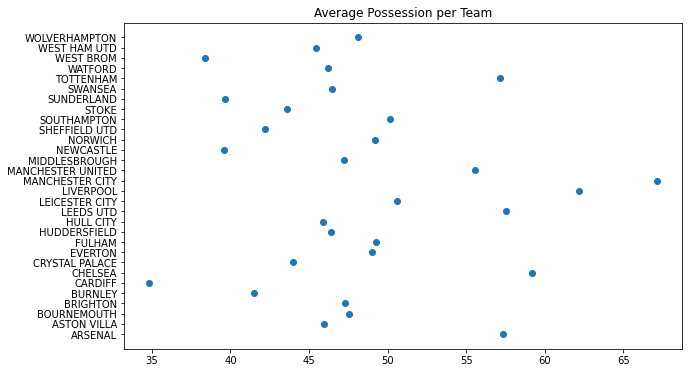

In [ ]:
plt.subplots(figsize=(10, 6))
plt.scatter(x="Average Posses", y="Team", data=dfteams)
plt.title("Average Possession per Team")
plt.show()


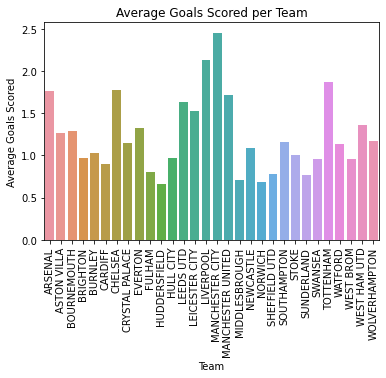

In [ ]:
sns.barplot(x="Team", y="Average Goals Scored", data=dfteams)
plt.xticks(rotation=90)
plt.title("Average Goals Scored per Team")
plt.show()


In [4]:
dfteams.head()

NameError: name 'dfteams' is not defined

In [3]:
 # Instancier le transformeur StandardScaler
scaler = Normalizer()

# Normaliser les données
df_normalized = pd.DataFrame(scaler.fit_transform(dfteams), columns=dfteams.columns)

# Afficher les données normalisées
df_normalized

df_normalized.drop(["Team","Average YellowC","Average SecYellowC","Average RedC"], axis=1)

df_normalized = df_normalized.corr()

NameError: name 'dfteams' is not defined

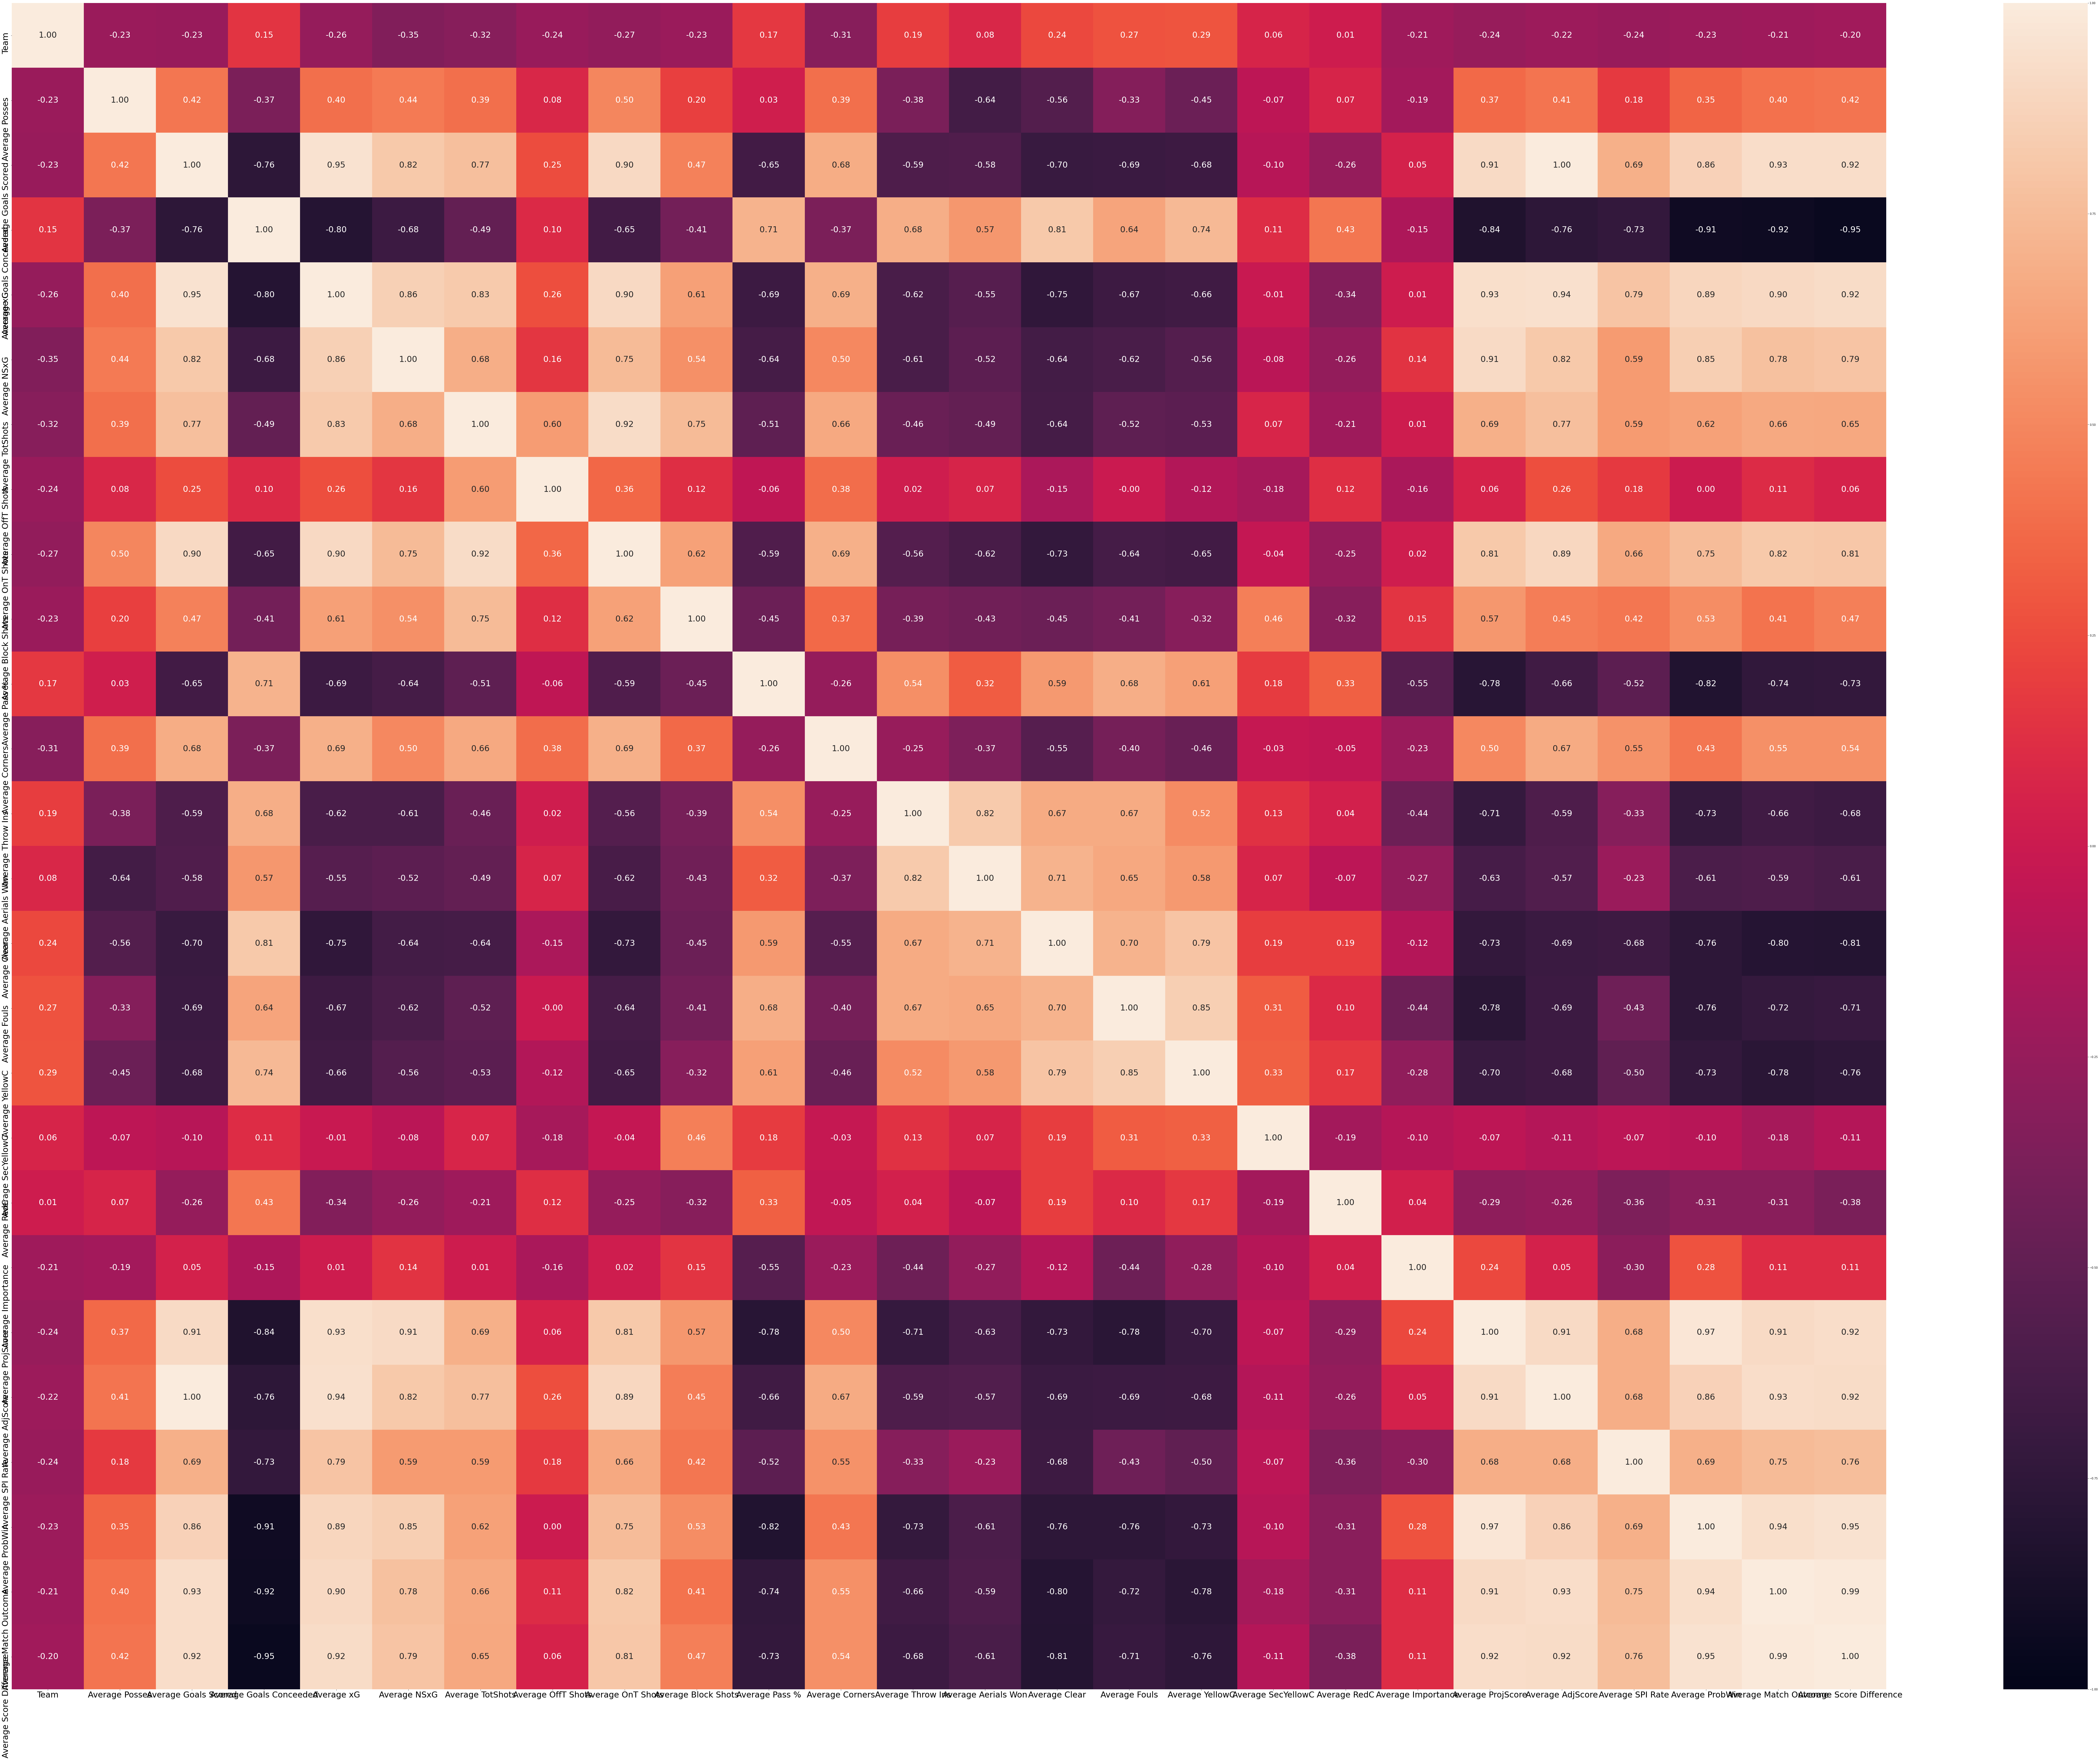

In [ ]:
plt.figure(figsize=(120, 90))
heatmap= sns.heatmap(data=df_normalized, annot=True, fmt='.2f', vmin=-1, vmax=1,annot_kws={"fontsize":30})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=30)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=30)
plt.tight_layout()
plt.show()

***
## **ENCODAGE :** ##  
*avec fonctions d'encodage et de décodage pour les noms d'équipes pour tous les dataframe*  
***  


***FONCTIONS POUR LE DATAFRAME DE BASE***

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# encodeur sur les noms des équipes
encoder.fit(df[["Home Team", "Away Team"]])


# FONCTIONS POUR VISUALISER LES NOMS D'EQUIPES
def decode_df():
    df[["Home Team", "Away Team"]] = encoder.inverse_transform(df[["Home Team", "Away Team"]]) # transformation des nombres en noms des équipes 

def encode_df():
    df[["Home Team", "Away Team"]] = encoder.transform(df[["Home Team", "Away Team"]])# transformation des noms des équipes en nombres

***CREATION DATAFRAME POUR IDENTIFIER L'ENCODAGE DE CHAQUE EQUIPE***

In [ ]:
teams_ID = pd.DataFrame()
encode_df()
teams_ID["Team ID"] = df["Home Team"].unique()
decode_df()
teams_ID["Team Name"] = df["Home Team"].unique()

In [ ]:
teams_ID.sort_values("Team Name")

,Team ID,Team Name
8,0.0,ARSENAL
27,1.0,ASTON VILLA
7,2.0,BOURNEMOUTH
20,3.0,BRIGHTON
3,4.0,BURNLEY
25,5.0,CARDIFF
9,6.0,CHELSEA
5,7.0,CRYSTAL PALACE
1,8.0,EVERTON
23,9.0,FULHAM


***FONCTIONS POUR LE DATAFRAME DES EQUIPES***

In [ ]:
encoder_t = OrdinalEncoder()
encoder_t.fit(dfteams[["Team"]])
def decode_dfteams():
    dfteams[["Team"]] = encoder_t.inverse_transform(dfteams[["Team"]]) # transformation des nombres en noms des équipes e

def encode_dfteams():
    dfteams[["Team"]] = encoder_t.transform(dfteams[["Team"]]) # transformation des nombres en noms des équipes

***FONCTIONS POUR LE DATAFRAME DES CONFRONTATIONS***

In [ ]:
encoder.fit(matchs[["Home Team", "Away Team"]])
def decode_matchs():
   matchs[["Home Team", "Away Team"]] = encoder.inverse_transform(matchs[["Home Team", "Away Team"]])

def encode_matchs():
    matchs[["Home Team", "Away Team"]] = encoder.transform(matchs[["Home Team", "Away Team"]])

---
---

## **MODELE** ##

***ON COMMENCE DONC PAR ENCODER NOS VALEURS CATEGORIELLES***

In [ ]:
encode_df()
encode_dfteams()
encode_matchs()

<ipython-input-222-5194a3e62d55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchs[["Home Team", "Away Team"]] = encoder.transform(matchs[["Home Team", "Away Team"]])
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
dfteams

,Team,Average Posses,Average Goals Scored,Average Goals Conceeded,Average xG,Average NSxG,Average TotShots,Average OffT Shots,Average OnT Shots,Average Block Shots,Average Pass %,Average Corners,Average Throw Ins,Average Aerials Won,Average Clear,Average Fouls,Average YellowC,Average SecYellowC,Average RedC,Average Importance,Average ProjScore,Average AdjScore,Average SPI Rate,Average ProbWin,Average Match Outcome,Average Score Difference
8,0.0,57.347368,1.763158,1.226316,1.645000,1.897842,13.121053,4.784211,4.778947,3.568421,83.200000,5.784211,19.878947,14.963158,19.589474,10.305263,1.757895,0.015789,0.073684,44.047526,1.808053,1.756789,80.288789,0.503368,0.210526,0.536842
27,1.0,45.973684,1.263158,1.486842,1.388816,1.278684,12.894737,4.934211,4.447368,3.539474,76.697368,5.434211,20.631579,18.592105,20.500000,11.710526,1.789474,0.065789,0.000000,37.890263,1.240789,1.276316,68.969868,0.313289,-0.144737,-0.223684
7,2.0,47.532895,1.289474,1.730263,1.313158,1.301974,11.519737,4.394737,3.960526,3.177632,76.782895,5.236842,21.736842,18.197368,26.776316,9.315789,1.618421,0.032895,0.019737,22.522961,1.244013,1.295132,62.325000,0.297237,-0.184211,-0.440789
20,3.0,47.276316,0.973684,1.407895,1.191382,1.207303,11.197368,4.730263,3.361842,3.105263,77.000000,4.710526,21.671053,18.782895,21.453947,11.105263,1.447368,0.026316,0.065789,25.067763,1.063355,0.998618,63.984276,0.281316,-0.197368,-0.434211
3,4.0,41.489474,1.031579,1.405263,1.120158,1.163737,10.010526,4.215789,3.310526,2.500000,69.189474,4.205263,21.636842,24.889474,26.752632,10.173684,1.689474,0.005263,0.010526,21.561789,1.075947,1.046684,63.304368,0.283000,-0.126316,-0.373684
25,5.0,34.842105,0.894737,1.815789,1.086316,1.078421,10.973684,4.710526,3.315789,3.000000,63.236842,4.421053,21.026316,25.815789,25.736842,9.842105,1.736842,0.000000,0.026316,47.973684,1.021053,0.922368,58.423684,0.247895,-0.368421,-0.921053
9,6.0,59.215789,1.773684,1.052632,1.783211,1.916211,15.663158,5.584211,5.542105,4.536842,85.047368,5.978947,20.500000,15.473684,17.736842,10.084211,1.447368,0.015789,0.021053,64.628211,1.929211,1.772842,84.988000,0.585316,0.352632,0.721053
5,7.0,43.994737,1.147368,1.510526,1.182368,1.265105,11.226316,4.515789,3.621053,3.110526,74.410526,4.978947,22.115789,19.526316,23.600000,11.126316,1.715789,0.010526,0.021053,21.140474,1.135526,1.144263,64.624316,0.291684,-0.152632,-0.363158
1,8.0,49.000000,1.321053,1.326316,1.358526,1.290579,11.731579,4.473684,4.168421,3.110526,77.121053,4.900000,21.578947,20.131579,24.552632,11.631579,1.652632,0.036842,0.036842,15.340474,1.314316,1.322684,70.406684,0.357579,0.036842,-0.005263
23,9.0,49.289474,0.802632,1.763158,1.096974,1.193947,11.789474,5.000000,3.697368,3.092105,79.684211,4.276316,20.381579,18.197368,22.421053,11.921053,1.802632,0.026316,0.039474,37.500000,1.075921,0.835395,62.520263,0.265395,-0.447368,-0.960526


In [ ]:
df.head(17)

,date,MatchWeek,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome
0,2016-08-13,1,11.0,13.0,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016,53.57,66.81,0.35,0.36,0.29,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05,1,1
1,2016-08-13,1,8.0,25.0,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016,68.02,73.25,0.39,0.34,0.27,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05,0,0
2,2016-08-13,1,17.0,22.0,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016,56.32,60.35,0.44,0.27,0.29,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05,0,0
3,2016-08-13,1,4.0,24.0,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016,58.98,59.74,0.45,0.27,0.29,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05,-1,-1
4,2016-08-13,1,21.0,26.0,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016,69.49,59.33,0.58,0.19,0.24,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05,0,0
5,2016-08-13,1,7.0,27.0,3.3,5.9,6.8,62,38,7.0,4.0,14.0,3.0,3.0,21.0,72.0,21.0,21.0,12.0,2.0,0.0,0.0,8.0,3.0,13.0,2.0,6.0,34.0,58.0,21.0,23.0,15.0,2.0,0.0,0.0,0,1,1,0,2016,55.19,58.66,0.42,0.29,0.28,1.35,1.14,43.6,34.6,1.11,0.68,0.84,1.60,0.00,1.05,-1,-1
6,2016-08-13,1,15.0,23.0,5.4,6.1,5.2,77,23,8.0,4.0,16.0,4.0,9.0,27.0,86.0,16.0,26.0,11.0,1.0,0.0,0.0,2.0,3.0,7.0,2.0,6.0,27.0,55.0,21.0,35.0,14.0,2.0,0.0,0.0,2,1,1,2,2016,86.42,53.64,0.82,0.05,0.13,2.69,0.48,73.0,27.0,2.14,1.25,1.81,0.92,2.10,1.05,1,1
7,2016-08-14,1,2.0,16.0,5.9,5.2,7.9,47,53,2.0,3.0,9.0,4.0,4.0,26.0,85.0,8.0,7.0,7.0,0.0,0.0,0.0,2.0,7.0,11.0,2.0,2.0,17.0,87.0,8.0,30.0,10.0,1.0,0.0,0.0,1,3,3,1,2016,61.57,80.49,0.21,0.55,0.24,1.15,1.78,27.9,58.0,0.51,2.21,1.11,0.88,1.05,3.15,-2,-1
8,2016-08-14,1,0.0,14.0,9.7,5.5,6.7,51,49,3.0,5.0,9.0,1.0,5.0,25.0,80.0,22.0,9.0,13.0,3.0,0.0,0.0,3.0,7.0,16.0,6.0,4.0,22.0,79.0,17.0,26.0,17.0,3.0,0.0,0.0,3,4,4,3,2016,82.55,77.44,0.56,0.21,0.23,1.91,1.21,62.7,63.9,1.14,1.84,1.19,1.49,3.15,4.20,-1,-1
9,2016-08-15,1,6.0,28.0,5.9,6.5,5.6,62,38,6.0,6.0,16.0,4.0,7.0,29.0,86.0,24.0,17.0,16.0,5.0,0.0,0.0,2.0,3.0,7.0,2.0,1.0,12.0,73.0,25.0,26.0,16.0,2.0,0.0,0.0,2,1,1,2,2016,80.70,63.27,0.69,0.12,0.19,2.23,0.91,67.7,25.5,1.55,0.55,1.76,0.75,2.10,1.05,1,1


In [ ]:
# df =df.drop("HT Goals Scored", axis = 1)
# df = df.drop("AT Goals Scored", axis = 1)
df = df.drop("HT Goals Conceeded", axis = 1)
df = df.drop("AT Goals Conceeded", axis = 1)

In [ ]:
features = ['season', 'Home Team', 'Match Excitement','Away Team',"HT Goals Scored", "AT Goals Scored", 'Match Excitement',
       #'HT Rating', 'AT Rating',
       'HT Posses %','AT Posses %', 
       # 'HT OffT Shots','HT OnT Shots', 'HT TotShots',
       # 'HT Block Shots', 'HT Corners', 'HT Throw Ins',
       # 'HT Pass %', 'HT Aerials Won',
       # 'HT Clear', 'HT Fouls', 'HT YellowC',
       # 'HT SecYellowC', 'HT RedC',
       # 'AT OffT Shots', 'AT OnT Shots',
       # 'AT TotShots', 'AT Block Shots', 'AT Corners',
       # 'AT Throw Ins', 'AT Pass %',
       # 'AT Aerials Won', 'AT Clear', 'AT Fouls',
       # 'AT YellowC', 'AT SecYellowC',
       # 'AT RedC', 'HT xG', 'AT xG',
       # 'HT NSxG', 'AT NSxG', 'HT SPI Rate','AT SPI Rate'
       ]

In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.3, random_state=42)

# Entraînement d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# scores = cross_val_score(clf, df[features], df["Score Difference"], cv=5)
# print("Cross-validation scores:", scores*100)
# print("Average score:", scores.mean()*100)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))



Précision : 99.47%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres à tester
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}

# Création d'un objet GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Entraînement sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Prédiction sur l'ensemble de test avec les meilleurs paramètres
y_pred = grid_search.predict(X_test)

# Calcul de la précision avec les meilleurs paramètres
accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Meilleurs paramètres trouvés :
{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Précision : 100.00%


/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Création d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur des données d'entraînement
clf.fit(X_train, y_train)

# Récupération des scores d'importance des fonctionnalités
importances = clf.feature_importances_

# Affichage des scores d'importance pour chaque fonctionnalité
for i, feature in enumerate(features):
    print("Score d'importance pour la fonctionnalité", feature, ":", importances[i])


Score d'importance pour la fonctionnalité season : 0.008946653284063969
Score d'importance pour la fonctionnalité Home Team : 0.014132205718319558
Score d'importance pour la fonctionnalité Match Excitement : 0.10321129652723739
Score d'importance pour la fonctionnalité Away Team : 0.014879833595655386
Score d'importance pour la fonctionnalité HT Goals Scored : 0.37778857402304195
Score d'importance pour la fonctionnalité AT Goals Scored : 0.3530818271954901
Score d'importance pour la fonctionnalité Match Excitement : 0.09007225437783485
Score d'importance pour la fonctionnalité HT Posses % : 0.020709624457799527
Score d'importance pour la fonctionnalité AT Posses % : 0.017177730820557305


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1330, 9)
(570, 9)


In [ ]:
correct_predictions = []
incorrect_predictions = []

for i in range(len(y_pred)):
    if y_pred[i] == y_test.values[i]:
        correct_predictions.append(X_test.index[i])
    else:
        incorrect_predictions.append(X_test.index[i])

print("Nombre de prédictions correctes :", len(correct_predictions))
print("Nombre de prédictions incorrectes :", len(incorrect_predictions))

# Affichage des prédictions correctes
# print("Prédictions correctes :")
# for i in correct_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

# # Affichage des prédictions incorrectes
# print("Prédictions incorrectes :")
# for i in incorrect_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])


Nombre de prédictions correctes : 567
Nombre de prédictions incorrectes : 3


In [ ]:
# print("Prédictions correctes :", len(correct_predictions))
# for i in correct_predictions:
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)],"prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

# Affichage des prédictions incorrectes
# print("Prédictions incorrectes :" , len(incorrect_predictions))
print("Match :", X_test["Home Team"].values[X_test.index.get_loc(incorrect_predictions[0])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[0])] ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[0])], " Résultat réel :", y_test[incorrect_predictions[0]])
print("Match :", X_test["Home Team"].values[X_test.index.get_loc(incorrect_predictions[0])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[0])] ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[0])])

print("Match :", X_test["Home Team"].values[X_test.index.get_loc(incorrect_predictions[1])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[1])] ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[1])], " Résultat réel :", y_test[incorrect_predictions[1]])
print("Match :", X_test["Home Team"].values[X_test.index.get_loc(incorrect_predictions[1])],"-", X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[1])] ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[1])])

# for i in incorrect_predictions:
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"proba :", y_pred2[X_test.index.get_loc(i)])

Match : 25.0 - 23.0 Prédiction : 0  Résultat réel : 1
Match : 25.0 - 23.0 Probas : [0.09 0.47 0.44]
Match : 3.0 - 29.0 Prédiction : -1  Résultat réel : 0
Match : 3.0 - 29.0 Probas : [0.41 0.32 0.27]


In [ ]:
teams_ID.sort_values(by=['Team ID'])

,Team ID,Team Name
8,0.0,ARSENAL
27,1.0,ASTON VILLA
7,2.0,BOURNEMOUTH
20,3.0,BRIGHTON
3,4.0,BURNLEY
25,5.0,CARDIFF
9,6.0,CHELSEA
5,7.0,CRYSTAL PALACE
1,8.0,EVERTON
23,9.0,FULHAM


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.predict_proba(X_train.head())


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X_train = df[features]
y_train = df["Match Outcome"]
X_train.head()


,season,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT xG,AT xG,HT NSxG,AT NSxG,HT SPI Rate,AT SPI Rate
0,2016,11.0,13.0,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,0.85,2.77,0.17,1.25,53.57,66.81
1,2016,8.0,25.0,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,0.73,1.11,0.88,1.81,68.02,73.25
2,2016,17.0,22.0,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1.40,0.55,1.13,1.06,56.32,60.35
3,2016,4.0,24.0,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,1.24,1.84,1.71,1.56,58.98,59.74
4,2016,21.0,26.0,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1.05,0.22,1.52,0.41,69.49,59.33


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Charger les données


# Sélectionner les colonnes à utiliser comme variables prédictives
features = ['HT Rating', 'AT Rating', 'HT Posses %', 'AT Posses %', 'HT OffT Shots', 'HT OnT Shots', 'HT TotShots', 'HT Block Shots', 'HT Corners', 'HT Throw Ins', 'HT Pass %', 'HT Aerials Won', 'HT Clear', 'HT Fouls', 'HT YellowC', 'HT SecYellowC', 'AT OffT Shots', 'AT OnT Shots', 'AT TotShots', 'AT Block Shots', 'AT Corners', 'AT Throw Ins', 'AT Pass %', 'AT Aerials Won', 'AT Clear', 'AT Fouls', 'AT YellowC', 'AT SecYellowC']

# Sélectionner la colonne à prédire
target = 'Match Outcome'

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Créer un modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire l'issue des matchs dans les données de test
y_pred = model.predict(X_test)

# Afficher le score de précision du modèle
print("Score de précision :", model.score(X_test, y_test))

print('Accuracy:', accuracy)


Score de précision : 0.8657894736842106
Accuracy: 0.5842105263157895


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Charger les données des confrontations
matchups_df = matchs

# Charger les données des statistiques des équipes
stats_df = dfteams


# Regrouper les données de chaque équipe en un seul dataframe
team_stats_dict = {}
for i, row in stats_df.iterrows():
    team_stats_dict[row["Team"]] = row.iloc[0:].to_dict()
    
# Fonction pour créer les features pour chaque confrontation
def create_matchup_features(matchup_row):
    team_1_stats = team_stats_dict[matchup_row["Home Team"]]
    team_2_stats = team_stats_dict[matchup_row["Away Team"]]
    
    matchup_features = []
    for stat in team_1_stats.keys():
        matchup_features.append(team_1_stats[stat])
        matchup_features.append(team_2_stats[stat])
    
    return matchup_features

# Créer les features pour chaque confrontation
matchup_features_list = []
for i, row in matchups_df.iterrows():
    matchup_features = create_matchup_features(row)
    matchup_features_list.append(matchup_features)
    
match_features = pd.DataFrame(matchup_features_list)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(match_features, matchups_df["Match Outcome"], test_size=0.2,random_state=42 )

# Créer un modèle de classification
clf = RandomForestClassifier(random_state=42)

# Entraîner le modèle de classification
clf.fit(X_train, y_train)

# Utiliser le modèle de classification pour prédire l'issue du match
team_1 = 11.0
team_2 = 16.0
team_1_stats = team_stats_dict[team_1]
team_2_stats = team_stats_dict[team_2]
matchup_features = []
for stat in team_1_stats.keys():
    matchup_features.append(team_1_stats[stat])
    matchup_features.append(team_2_stats[stat])
predicted_winner = clf.predict(pd.DataFrame([matchup_features]))


y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# Afficher le résultat de la prédiction
if predicted_winner == 1:
    print(f"{team_1} gagnera le match")
elif predicted_winner == -1:
    print(f"{team_2} gagnera le match")
else:
    print("Le match se terminera par un match nul")


accuracy = accuracy_score(y_test, y_pred)
#print("Score de précision :", model.score(X_test, y_test))

print('Accuracy:', accuracy)



16.0 gagnera le match
Accuracy: 0.49473684210526314


In [ ]:
X_train.shape

(1520, 52)

In [ ]:
X_test.shape

(380, 52)

In [ ]:
team_stats_list = [team_1_stats]
team_stats_list2 = [team_2_stats]
# créer le dataframe
team_stats_df = pd.DataFrame(team_stats_list)
team_stats_df2 = pd.DataFrame(team_stats_list2)
pd.merge(team_stats_df, team_stats_df2)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
match_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,11.0,13.0,45.921053,50.578947,0.973684,1.526316,2.105263,1.378947,0.908684,1.451947,0.930263,1.247158,10.447368,12.578947,4.815789,4.652632,3.315789,4.484211,2.315789,3.457895,76.500000,77.005263,4.710526,5.489474,19.000000,22.710526,15.473684,19.084211,28.973684,22.189474,10.578947,10.505263,1.763158,1.536842,0.000000,0.042105,0.131579,0.031579,47.326316,30.196842,0.900263,1.372842,0.993421,1.497000,47.601842,71.512789,0.208684,0.381263,-0.342105,0.021053,-1.131579,0.147368
1,8.0,25.0,49.000000,57.147368,1.321053,1.873684,1.326316,1.015789,1.358526,1.764789,1.290579,1.465368,11.731579,14.305263,4.473684,5.168421,4.168421,5.252632,3.110526,3.894737,77.121053,81.747368,4.900000,5.689474,21.578947,22.978947,20.131579,15.978947,24.552632,21.968421,11.631579,10.810526,1.652632,1.621053,0.036842,0.026316,0.036842,0.026316,15.340474,51.523105,1.314316,1.789211,1.322684,1.886211,70.406684,81.733105,0.357579,0.527526,0.036842,0.310526,-0.005263,0.857895
2,17.0,22.0,47.236842,43.618421,0.710526,1.000000,1.394737,1.631579,0.908684,1.114605,1.015263,1.319868,9.236842,10.644737,3.947368,4.355263,2.631579,3.539474,2.657895,2.750000,76.184211,72.355263,3.710526,4.263158,19.631579,22.605263,20.368421,23.644737,28.684211,28.592105,12.684211,11.460526,2.052632,1.750000,0.026316,0.013158,0.000000,0.026316,35.102368,27.660000,0.930263,1.131447,0.746053,1.038947,53.008947,58.700000,0.257105,0.292895,-0.394737,-0.223684,-0.684211,-0.631579
3,4.0,24.0,41.489474,46.473684,1.031579,0.960526,1.405263,1.657895,1.120158,0.971974,1.163737,1.105263,10.010526,9.776316,4.215789,4.000000,3.310526,3.276316,2.500000,2.513158,69.189474,77.592105,4.205263,4.552632,21.636842,22.039474,24.889474,18.197368,26.752632,26.052632,10.173684,10.236842,1.689474,1.407895,0.005263,0.000000,0.010526,0.013158,21.561789,44.128947,1.075947,1.056053,1.046684,0.999737,63.304368,54.920658,0.283000,0.258026,-0.126316,-0.289474,-0.373684,-0.697368
4,21.0,26.0,50.142105,46.223684,1.163158,1.131579,1.563158,1.677632,1.321895,1.222105,1.232316,1.354276,12.663158,11.335526,5.005263,4.526316,4.436842,3.631579,3.268421,3.197368,75.868421,73.842105,5.289474,4.546053,22.357895,22.138158,18.142105,20.848684,22.989474,24.677632,11.263158,12.315789,1.594737,2.026316,0.026316,0.046053,0.047368,0.059211,22.527474,20.964934,1.222579,1.223092,1.176737,1.156645,67.221474,63.993355,0.323211,0.307303,-0.152632,-0.203947,-0.400000,-0.546053


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
1005,25.0,18.0,57.147368,39.559211,1.873684,1.085526,1.015789,1.414474,1.764789,1.130658,1.465368,0.982105,14.305263,11.105263,5.168421,4.309211,5.252632,3.710526,3.894737,3.098684,81.747368,72.763158,5.689474,4.342105,22.978947,20.421053,15.978947,20.203947,21.968421,26.473684,10.810526,10.460526,1.621053,1.572368,0.026316,0.019737,0.026316,0.046053,51.523105,28.155263,1.789211,1.037632,1.886211,1.095197,81.733105,62.141053,0.527526,0.267763,0.310526,-0.138158,0.857895,-0.328947
1794,28.0,12.0,45.426316,57.552632,1.357895,1.631579,1.557895,1.421053,1.329474,1.538684,1.233579,1.476579,11.573684,13.736842,4.626316,5.210526,3.984211,5.236842,2.984211,3.289474,76.189474,79.500000,4.621053,6.026316,21.394737,21.263158,19.526316,14.105263,23.126316,15.684211,9.884211,11.368421,1.721053,1.605263,0.036842,0.000000,0.026316,0.026316,26.848895,11.423684,1.266421,1.265526,1.379421,1.626053,65.062263,69.017632,0.312474,0.301842,-0.068421,0.078947,-0.200000,0.210526
1775,20.0,14.0,42.210526,62.157895,0.776316,2.126316,1.342105,0.931579,1.060921,2.120000,0.971974,2.104789,8.921053,16.057895,3.657895,5.621053,2.855263,6.000000,2.434211,4.442105,74.434211,83.389474,5.026316,6.536842,21.434211,23.489474,21.605263,15.968421,21.855263,17.763158,11.421053,9.384211,1.776316,1.131579,0.013158,0.010526,0.052632,0.010526,22.707895,62.161579,0.987895,2.183421,0.801842,2.118684,66.226974,87.683421,0.263684,0.637053,-0.263158,0.531579,-0.565789,1.194737
339,17.0,15.0,47.236842,67.131579,0.710526,2.452632,1.394737,0.821053,0.908684,2.396895,1.015263,2.429053,9.236842,17.505263,3.947368,6.273684,2.631579,6.447368,2.657895,4.784211,76.184211,88.105263,3.710526,7.405263,19.631579,19.278947,20.368421,13.894737,28.684211,15.452632,12.684211,9.415789,2.052632,1.494737,0.026316,0.021053,0.000000,0.047368,35.102368,52.783368,0.930263,2.423737,0.746053,2.433632,53.008947,91.530053,0.257105,0.711737,-0.394737,0.594737,-0.684211,1.631579
824,15.0,3.0,67.131579,47.276316,2.452632,0.973684,0.821053,1.407895,2.396895,1.191382,2.429053,1.207303,17.505263,11.197368,6.273684,4.730263,6.447368,3.361842,4.784211,3.105263,88.105263,77.000000,7.405263,4.710526,19.278947,21.671053,13.894737,18.782895,15.452632,21.453947,9.415789,11.105263,1.494737,1.447368,0.021053,0.026316,0.047368,0.065789,52.783368,25.067763,2.423737,1.063355,2.433632,0.998618,91.530053,63.984276,0.711737,0.281316,0.594737,-0.197368,1.631579,-0.434211


In [ ]:
correct_predictions = []
incorrect_predictions = []

for i in range(len(y_pred)):
    if y_pred[i] == y_test.values[i]:
        correct_predictions.append(X_test.index[i])
    else:
        incorrect_predictions.append(X_test.index[i])

print("Nombre de prédictions correctes :", len(correct_predictions))
print("Nombre de prédictions incorrectes :", len(incorrect_predictions))

# Affichage des prédictions correctes
# print("Prédictions correctes :")
# for i in correct_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

# # Affichage des prédictions incorrectes
# print("Prédictions incorrectes :")
# for i in incorrect_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

Nombre de prédictions correctes : 188
Nombre de prédictions incorrectes : 192


In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
1222,1.0,3.0,45.973684,47.276316,1.263158,0.973684,1.486842,1.407895,1.388816,1.191382,1.278684,1.207303,12.894737,11.197368,4.934211,4.730263,4.447368,3.361842,3.539474,3.105263,76.697368,77.000000,5.434211,4.710526,20.631579,21.671053,18.592105,18.782895,20.500000,21.453947,11.710526,11.105263,1.789474,1.447368,0.065789,0.026316,0.000000,0.065789,37.890263,25.067763,1.240789,1.063355,1.276316,0.998618,68.969868,63.984276,0.313289,0.281316,-0.144737,-0.197368,-0.223684,-0.434211
111,25.0,28.0,57.147368,45.426316,1.873684,1.357895,1.015789,1.557895,1.764789,1.329474,1.465368,1.233579,14.305263,11.573684,5.168421,4.626316,5.252632,3.984211,3.894737,2.984211,81.747368,76.189474,5.689474,4.621053,22.978947,21.394737,15.978947,19.526316,21.968421,23.126316,10.810526,9.884211,1.621053,1.721053,0.026316,0.036842,0.026316,0.026316,51.523105,26.848895,1.789211,1.266421,1.886211,1.379421,81.733105,65.062263,0.527526,0.312474,0.310526,-0.068421,0.857895,-0.200000
554,26.0,10.0,46.223684,46.407895,1.131579,0.657895,1.677632,1.763158,1.222105,0.794211,1.354276,0.916974,11.335526,10.026316,4.526316,4.092105,3.631579,3.000000,3.197368,2.960526,73.842105,73.368421,4.546053,4.302632,22.138158,24.434211,20.848684,21.947368,24.677632,22.736842,12.315789,10.750000,2.026316,1.565789,0.046053,0.039474,0.059211,0.052632,20.964934,38.280263,1.223092,0.835658,1.156645,0.671053,63.993355,52.417500,0.307303,0.210921,-0.203947,-0.460526,-0.546053,-1.105263
526,26.0,25.0,46.223684,57.147368,1.131579,1.873684,1.677632,1.015789,1.222105,1.764789,1.354276,1.465368,11.335526,14.305263,4.526316,5.168421,3.631579,5.252632,3.197368,3.894737,73.842105,81.747368,4.546053,5.689474,22.138158,22.978947,20.848684,15.978947,24.677632,21.968421,12.315789,10.810526,2.026316,1.621053,0.046053,0.026316,0.059211,0.026316,20.964934,51.523105,1.223092,1.789211,1.156645,1.886211,63.993355,81.733105,0.307303,0.527526,-0.203947,0.310526,-0.546053,0.857895
1310,8.0,0.0,49.000000,57.347368,1.321053,1.763158,1.326316,1.226316,1.358526,1.645000,1.290579,1.897842,11.731579,13.121053,4.473684,4.784211,4.168421,4.778947,3.110526,3.568421,77.121053,83.200000,4.900000,5.784211,21.578947,19.878947,20.131579,14.963158,24.552632,19.589474,11.631579,10.305263,1.652632,1.757895,0.036842,0.015789,0.036842,0.073684,15.340474,44.047526,1.314316,1.808053,1.322684,1.756789,70.406684,80.288789,0.357579,0.503368,0.036842,0.210526,-0.005263,0.536842


In [ ]:
print("Match :", X_test[0].values[X_test.index.get_loc(incorrect_predictions[0])],"-", X_test[1].values[X_test.index.get_loc(incorrect_predictions[0])] ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[0])], " Résultat réel :", y_test[incorrect_predictions[0]])
print("Match :", X_test[0].values[X_test.index.get_loc(incorrect_predictions[0])],"-", X_test[1].values[X_test.index.get_loc(incorrect_predictions[0])] ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[0])])

print("Match :", X_test[0].values[X_test.index.get_loc(incorrect_predictions[1])],"-", X_test[1].values[X_test.index.get_loc(incorrect_predictions[1])] ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[1])], " Résultat réel :", y_test[incorrect_predictions[1]])
print("Match :", X_test[0].values[X_test.index.get_loc(incorrect_predictions[1])],"-", X_test[1].values[X_test.index.get_loc(incorrect_predictions[1])] ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[1])])


KeyError: 1222

In [ ]:
encode_dfteams()


In [ ]:
y_train.shape

(1520,)

In [ ]:
match_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,45.921053,50.578947,0.973684,1.526316,2.105263,1.378947,0.908684,1.451947,0.930263,1.247158,10.447368,12.578947,4.815789,4.652632,3.315789,4.484211,2.315789,3.457895,76.500000,77.005263,4.710526,5.489474,19.000000,22.710526,15.473684,19.084211,28.973684,22.189474,10.578947,10.505263,1.763158,1.536842,0.000000,0.042105,0.131579,0.031579,47.326316,30.196842,0.900263,1.372842,0.993421,1.497000,47.601842,71.512789,0.208684,0.381263,-0.342105,0.021053,-1.131579,0.147368
1,49.000000,57.147368,1.321053,1.873684,1.326316,1.015789,1.358526,1.764789,1.290579,1.465368,11.731579,14.305263,4.473684,5.168421,4.168421,5.252632,3.110526,3.894737,77.121053,81.747368,4.900000,5.689474,21.578947,22.978947,20.131579,15.978947,24.552632,21.968421,11.631579,10.810526,1.652632,1.621053,0.036842,0.026316,0.036842,0.026316,15.340474,51.523105,1.314316,1.789211,1.322684,1.886211,70.406684,81.733105,0.357579,0.527526,0.036842,0.310526,-0.005263,0.857895
2,47.236842,43.618421,0.710526,1.000000,1.394737,1.631579,0.908684,1.114605,1.015263,1.319868,9.236842,10.644737,3.947368,4.355263,2.631579,3.539474,2.657895,2.750000,76.184211,72.355263,3.710526,4.263158,19.631579,22.605263,20.368421,23.644737,28.684211,28.592105,12.684211,11.460526,2.052632,1.750000,0.026316,0.013158,0.000000,0.026316,35.102368,27.660000,0.930263,1.131447,0.746053,1.038947,53.008947,58.700000,0.257105,0.292895,-0.394737,-0.223684,-0.684211,-0.631579
3,41.489474,46.473684,1.031579,0.960526,1.405263,1.657895,1.120158,0.971974,1.163737,1.105263,10.010526,9.776316,4.215789,4.000000,3.310526,3.276316,2.500000,2.513158,69.189474,77.592105,4.205263,4.552632,21.636842,22.039474,24.889474,18.197368,26.752632,26.052632,10.173684,10.236842,1.689474,1.407895,0.005263,0.000000,0.010526,0.013158,21.561789,44.128947,1.075947,1.056053,1.046684,0.999737,63.304368,54.920658,0.283000,0.258026,-0.126316,-0.289474,-0.373684,-0.697368
4,50.142105,46.223684,1.163158,1.131579,1.563158,1.677632,1.321895,1.222105,1.232316,1.354276,12.663158,11.335526,5.005263,4.526316,4.436842,3.631579,3.268421,3.197368,75.868421,73.842105,5.289474,4.546053,22.357895,22.138158,18.142105,20.848684,22.989474,24.677632,11.263158,12.315789,1.594737,2.026316,0.026316,0.046053,0.047368,0.059211,22.527474,20.964934,1.222579,1.223092,1.176737,1.156645,67.221474,63.993355,0.323211,0.307303,-0.152632,-0.203947,-0.400000,-0.546053


In [ ]:
encode

In [ ]:
dfteams[dfteams["Team"] == "HULL CITY"]

,Team,Average Posses,Average Goals Scored,Average Goals Conceeded,Average xG,Average NSxG,Average TotShots,Average OffT Shots,Average OnT Shots,Average Block Shots,Average Pass %,Average Corners,Average Throw Ins,Average Aerials Won,Average Clear,Average Fouls,Average YellowC,Average SecYellowC,Average RedC,Average Importance,Average ProjScore,Average AdjScore,Average SPI Rate,Average ProbWin,Average Match Outcome,Average Score Difference
0,HULL CITY,45.921053,0.973684,2.105263,0.908684,0.930263,10.447368,4.815789,3.315789,2.315789,76.5,4.710526,19.0,15.473684,28.973684,10.578947,1.763158,0.0,0.131579,47.326316,0.900263,0.993421,47.601842,0.208684,-0.342105,-1.131579


In [ ]:
dfteams[dfteams["Team"] == "LEICESTER CITY"]

,Team,Average Posses,Average Goals Scored,Average Goals Conceeded,Average xG,Average NSxG,Average TotShots,Average OffT Shots,Average OnT Shots,Average Block Shots,Average Pass %,Average Corners,Average Throw Ins,Average Aerials Won,Average Clear,Average Fouls,Average YellowC,Average SecYellowC,Average RedC,Average Importance,Average ProjScore,Average AdjScore,Average SPI Rate,Average ProbWin,Average Match Outcome,Average Score Difference
11,LEICESTER CITY,50.578947,1.526316,1.378947,1.451947,1.247158,12.578947,4.652632,4.484211,3.457895,77.005263,5.489474,22.710526,19.084211,22.189474,10.505263,1.536842,0.042105,0.031579,30.196842,1.372842,1.497,71.512789,0.381263,0.021053,0.147368


In [ ]:
teams_ID.sort_values("Team ID")

,Team ID,Team Name
8,0.0,ARSENAL
27,1.0,ASTON VILLA
7,2.0,BOURNEMOUTH
20,3.0,BRIGHTON
3,4.0,BURNLEY
25,5.0,CARDIFF
9,6.0,CHELSEA
5,7.0,CRYSTAL PALACE
1,8.0,EVERTON
23,9.0,FULHAM
